# Principal components analysis

PCA identifies the combination of attributes (directions in feature space) that account for the most variance in the dataset.

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
cd /gdrive/My Drive/Colab Notebooks/ML PRACTICAL/PCA

/gdrive/My Drive/Colab Notebooks/ML PRACTICAL/PCA


In [5]:
pip uninstall django-model-utils

In [6]:
pip install django-model-utils

     |████████████████████████████████| 7.9 MB 21.4 MB/s 


In [11]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from utils import label_map_util
from utils import visualization_utils as vis_util
from utils import plot_decision

ModuleNotFoundError: ignored

## Load and prep the data

In [ ]:
# load the iris data
df = pd.read_csv('iris.csv')
df['species_label'], uniques = pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


#Standardize the Data

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
plt.style.use('seaborn')


In [ ]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = df.loc[:, features].values


In [ ]:
y = df.loc[:,['species']].values


In [ ]:
x = StandardScaler().fit_transform(x)


In [ ]:
pd.DataFrame(data = x, columns = features).head()


,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


#PCA Projection to 2D


In [ ]:
pca = PCA(n_components=2)


In [ ]:
principalComponents = pca.fit_transform(x)


In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


In [ ]:
principalDf.head(5)


,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [ ]:
df[['species']].head()


,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
finalDf = pd.concat([principalDf, df[['species']]], axis = 1)
finalDf.head(5)


,principal component 1,principal component 2,species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


#Visualize 2D Projection

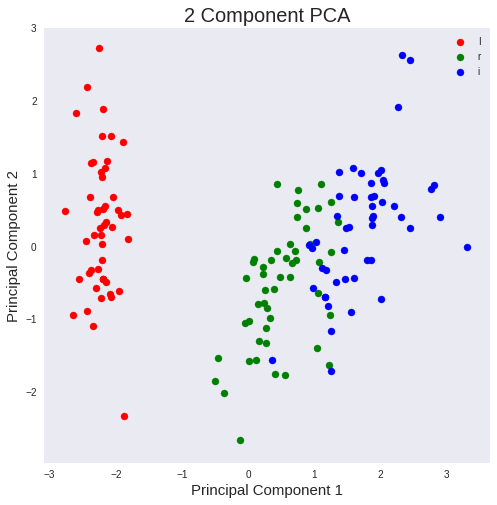

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for species, color in zip(species,colors):
    indicesToKeep = finalDf['species'] == species
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(species)
ax.grid()


#Explained Variance

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [ ]:
pca.explained_variance_ratio_


array([0.72770452, 0.23030523])

#Together, the first two principal components contain 95.80% of the information. The first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. The third and fourth principal component contained the rest of the variance of the dataset.
What are other applications of PCA (other than visualizing data)?

If your learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up is a reasonable choice. (most common application in my opinion). We will see this in the MNIST dataset.

If memory or disk space is limited, PCA allows you to save space in exchange for losing a little of the data’s information. This can be a reasonable tradeoff.
What are the limitations of PCA?

    PCA is not scale invariant. check: we need to scale our data first.
    The directions with largest variance are assumed to be of the most interest
    Only considers orthogonal transformations (rotations) of the original variables
    PCA is only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this, but some are not.
    If the variables are correlated, PCA can achieve dimension reduction. If not, PCA just orders them according to their variances.

